In [5]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [6]:
ROOT_PATH = "../../" #"../../../desarrollo/"

csv_file = ROOT_PATH + "Data/Annotations/audio_annotations.csv"
csv_file = ROOT_PATH + "Data/Dataset/CSVs/dataset.csv"

In [7]:
# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/images/"

In [8]:
# Read the CSV file
df = pd.read_csv(csv_file)

In [9]:
df

path annotator recorder        date  \
0     AM1/2023_05_10/AM1_20230510_060000.WAV       Edu      AM1  2023/05/10   
1     AM1/2023_05_10/AM1_20230510_060000.WAV       Edu      AM1  2023/05/10   
2     AM1/2023_05_10/AM1_20230510_060000.WAV       Edu      AM1  2023/05/10   
3     AM1/2023_05_10/AM1_20230510_060000.WAV       Edu      AM1  2023/05/10   
4     AM1/2023_05_10/AM1_20230510_060000.WAV       Edu      AM1  2023/05/10   
...                                      ...       ...      ...         ...   
3744  AM8/2023_05_30/AM8_20230530_110000.WAV    Giulia      AM8  2023/05/30   
3745  AM8/2023_05_30/AM8_20230530_110000.WAV    Giulia      AM8  2023/05/30   
3746  AM8/2023_05_30/AM8_20230530_110000.WAV    Giulia      AM8  2023/05/30   
3747  AM8/2023_05_30/AM8_20230530_110000.WAV    Giulia      AM8  2023/05/30   
3748  AM8/2023_05_30/AM8_20230530_110000.WAV    Giulia      AM8  2023/05/30   

          time audio_duration  start_time   end_time  low_frequency  \
0     06:00:00       00:01:00   12.488571  13.105714    3003.168457   
1     06:00:00       00:01:00    5.914286   6.925714    1881.718994   
2     06:00:00       00:01:00   41.194286  41.734286    2604.460205   
3     06:00:00       00:01:00   11.331429  12.394286    1801.304199   
4     06:00:00       00:01:00   30.548571  32.537143    2820.347168   
...        ...            ...         ...        ...            ...   
3744  11:00:00       00:01:00   15.326958  19.618950    7534.428564   
3745  11:00:00       00:01:00   10.070100  11.012785   10045.170898   
3746  11:00:00       00:01:00   14.339911  16.039736    1607.101094   
3747  11:00:00       00:01:00   48.498399  51.803344   11486.522738   
3748  11:00:00       00:01:00    5.012869   7.379209    1746.958767   

      high_frequency                 specie  \
0        5366.754395       Galerida theklae   
1        3449.984619        Cyanopica cooki   
2        3502.845947        Cyanopica cooki   
3        3502.845947        Cyanopica cooki   
4        5601.550781       Galerida theklae   
...              ...                    ...   
3744    16000.000000    Carduelis carduelis   
3745    15652.996094    Carduelis carduelis   
3746     3234.563699  Luscinia megarhynchos   
3747    14348.650436    Carduelis carduelis   
3748     4368.962709  Luscinia megarhynchos   

                                                   bbox  
0     [19, 0.2129032258064516, 0.20010527406349365, ...  
1     [13, 0.1064516129032258, 0.2439350565089254, 0...  
2     [13, 0.6903225806451613, 0.2275352877017647, 0...  
3     [13, 0.19731182795698926, 0.24530724483567576,...  
4     [19, 0.5252688172043011, 0.20106867887207103, ...  
...                                                 ...  
3744  [5, 0.2908602150537634, 0.1031186152388285, 0....  
3745  [5, 0.17526881720430107, 0.09031277026379966, ...  
3746  [23, 0.25268817204301075, 0.2546464671244051, ...  
3747  [5, 0.8349462365591398, 0.08804371979449326, 0...  
3748  [23, 0.10268817204301076, 0.23613408815225992,...  

[3749 rows x 12 columns]

In [10]:
# Load image from audio
audio_name = "AM1_20230511_060000.WAV"
image_name = audio_name.replace(".WAV", "")

In [11]:
# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

# Delete indexes from the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

In [12]:
filtered_df

path annotator recorder        date  \
0   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
1   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
2   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
3   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
4   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
5   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
6   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
7   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
8   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
9   AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
10  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
11  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
12  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
13  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
14  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
15  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
16  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
17  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   
18  AM1/2023_05_11/AM1_20230511_060000.WAV       Edu      AM1  2023/05/11   

        time audio_duration  start_time   end_time  low_frequency  \
0   06:00:00       00:01:00    0.000000   0.857143    2867.630370   
1   06:00:00       00:01:00    5.820000   9.561429    2807.559185   
2   06:00:00       00:01:00    1.697143   2.614286    3088.199219   
3   06:00:00       00:01:00   14.297143  16.641429    2620.928889   
4   06:00:00       00:01:00   59.288571  60.000000    2858.432247   
5   06:00:00       00:01:00   20.202857  23.691429    2647.668701   
6   06:00:00       00:01:00   25.881429  26.271429    3228.475342   
7   06:00:00       00:01:00   27.990000  28.607143    3228.475342   
8   06:00:00       00:01:00   29.447143  30.870000    3033.500977   
9   06:00:00       00:01:00   33.141429  33.518571    3115.847900   
10  06:00:00       00:01:00   44.455714  47.151429    2874.100098   
11  06:00:00       00:01:00   42.450000  42.857143    3228.475342   
12  06:00:00       00:01:00   34.341429  35.451429    2746.478516   
13  06:00:00       00:01:00   10.757143  13.414286    2674.333114   
14  06:00:00       00:01:00   39.051429  40.932857    2811.724340   
15  06:00:00       00:01:00   54.698571  57.672857    2972.971515   
16  06:00:00       00:01:00   51.638571  53.065714    2973.269004   
17  06:00:00       00:01:00   49.607143  50.674286    3136.541250   
18  06:00:00       00:01:00    4.517143   5.438571    3171.752441   

    high_frequency            specie  \
0      5912.872733  Galerida theklae   
1      6223.142458  Galerida theklae   
2      5511.464355           Curruca   
3      6406.093073  Galerida theklae   
4      5883.548340  Galerida theklae   
5      5694.799805  Galerida theklae   
6      4478.902344  Galerida theklae   
7      4789.132324  Galerida theklae   
8      5834.484601  Galerida theklae   
9      4330.423828  Galerida theklae   
10     5648.465820  Galerida theklae   
11     4441.376953  Galerida theklae   
12     5980.001465  Galerida theklae   
13     5387.466218           Curruca   
14     5947.497087  Galerida theklae   
15     5980.001465  Galerida theklae   
16     5511.464355  Galerida theklae   
17     5883.548340  Galerida theklae   
18     5117.946777           Curruca   

                                                 bbox  
0   [19, 0.006989247311827957, 0.1976602624278431,...  
1   [19, 0.12795698924731183, 0.1962155868416007, ...  
2   [10, 0.035483870967741936, 0.19747707106428988...  
3   [19, 0.256989247311828, 0.1981345219619236, 0....  
4   [19, 0.9935483870967742, 0.1980

In [13]:
# Function to convert HH:MM:SS format to seconds
def hms_to_seconds(hms):
    if isinstance(hms, str):
        time_parts = hms.split(':')
        if len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
            return total_seconds
    elif isinstance(hms, float):
        return float(hms)
    return None

In [14]:
filtered_df["path"][0].replace(".WAV", ".PNG")

'AM1/2023_05_11/AM1_20230511_060000.PNG'

In [15]:
#!mv ../../../desarrollo/Data/Dataset/Images ../../../desarrollo/Data/Dataset/images

In [16]:
image_path = ROOT_PATH + "Data/Dataset/images/"
print(image_path)

../../Data/Dataset/images/


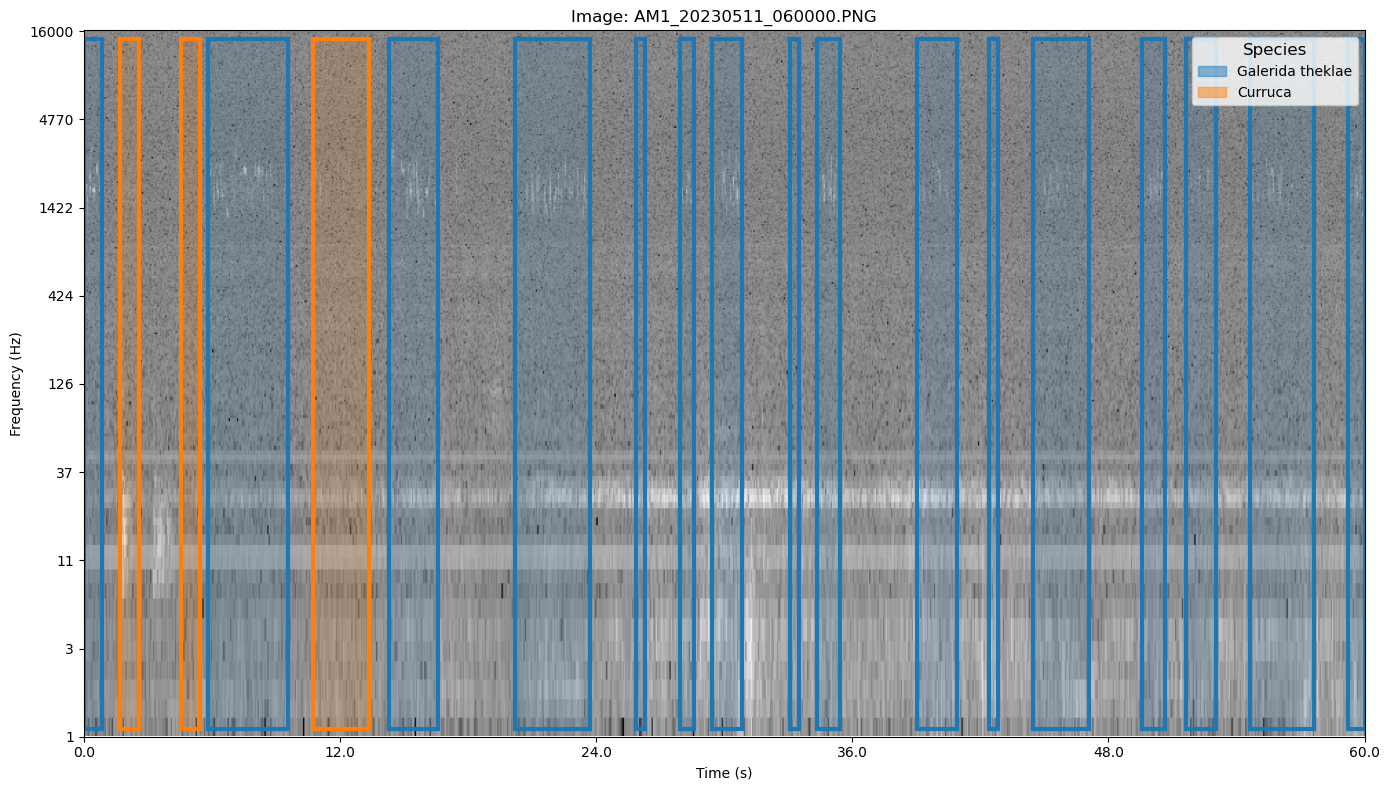

Image shape: (462, 930)
Image size: 625 KB
Image resolution: 1400x800 pixels


In [17]:
from matplotlib import patches

def load_and_display_image(image_path, annotations_df):
    # load gray image
    img = plt.imread(image_path)
    # make image only gray scale
    img = img.mean(axis=-1)
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.imshow(img, aspect='auto', cmap='gray')
    ax.set_title(f'Image: {os.path.basename(image_path)}')

    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])

    label_to_color = {
        'Galerida theklae': 'C0',
        'Curruca': 'C1'
    }

    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            color = label_to_color.get(label, 'gray')
            rect = patches.Rectangle(
                (start, 0+5), end - start, img.shape[0]-10,
                linewidth=2, edgecolor=color, facecolor=color, alpha=0.15
            )
            ax.add_patch(rect)
            # Dibujar un borde sin relleno
            edge_rect = patches.Rectangle(
                (start, 0+5), end - start, img.shape[0]-10,
                linewidth=3, edgecolor=color, fill=False
            )
            ax.add_patch(edge_rect)

    legend_patches = [patches.Patch(color=color, label=label, alpha=0.5) for label, color in label_to_color.items()]
    ax.legend(handles=legend_patches, title='Species', title_fontsize='large', loc='upper right')

    # Configurar las etiquetas del eje x para representar el tiempo en segundos, 5 valores
    ax.set_xticks(np.linspace(0, img.shape[1], 6))
    ax.set_xticklabels([f'{t:.1f}' for t in np.linspace(0, audio_duration, 6)])

    # Configurar las etiquetas del eje y para representar la frecuencia en Hz, de 16000 a 0, 10 values
    ax.set_yticks(np.linspace(0, img.shape[0], 9))
    # y labels in Hz, from 16000 to 0, in log scale
    ax.set_yticklabels([f'{int(f)}' for f in np.logspace(np.log10(16000), np.log10(1), 9)])

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    plt.tight_layout()

    # SAVE AS pdf
    plt.savefig("../../Figures/annotated_spectrogram.pdf", format='pdf')

    plt.show()

    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"].values[0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)

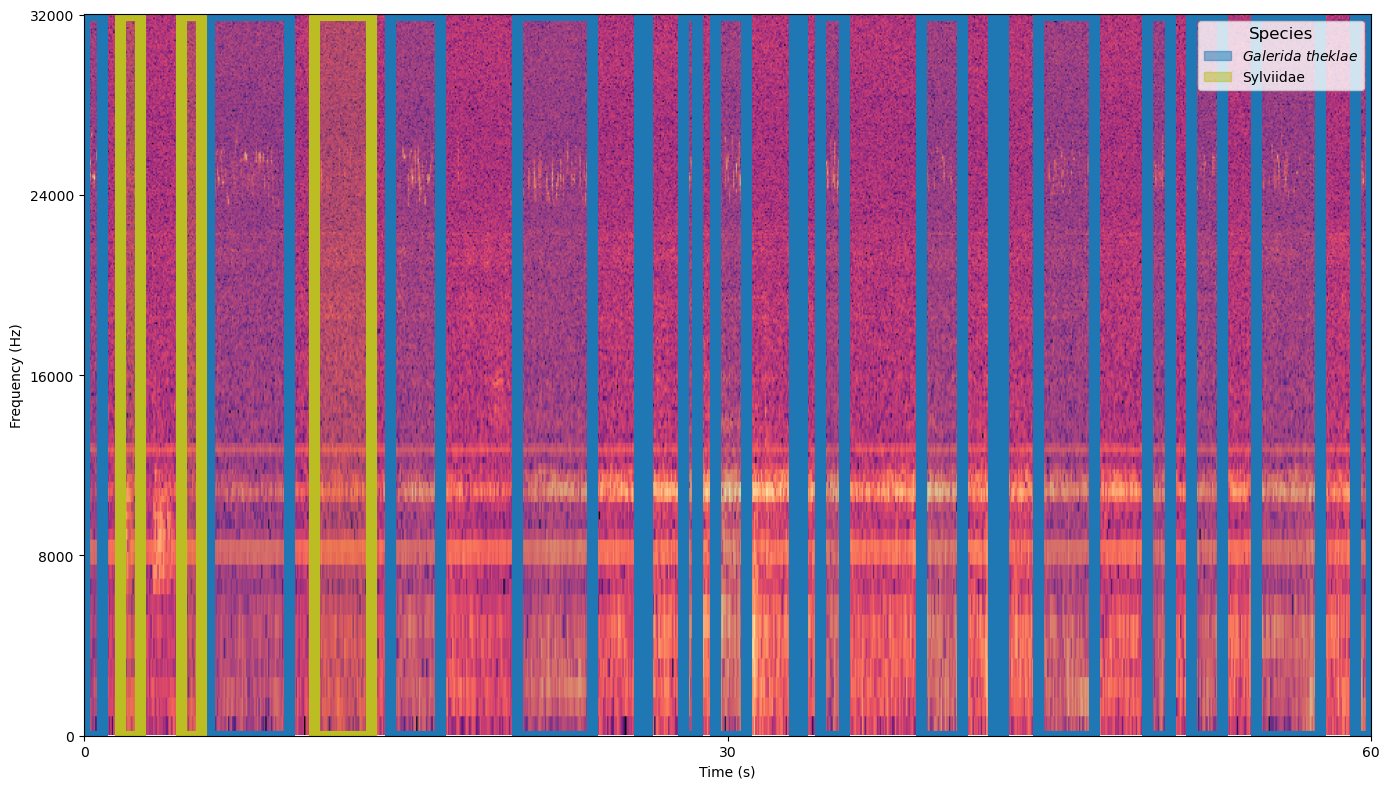

Image shape: (462, 930, 4)
Image size: 625 KB
Image resolution: 1400x800 pixels


In [19]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import os

# Función para transformar los nombres de las especies en la leyenda
def format_species_name(specie):
    if specie == 'Galerida theklae':
        return r"$\it{Galerida\ theklae}$"  # Nombre en cursiva
    elif specie == 'Curruca':
        return r"Sylviidae"  # Nombre en cursiva con "sp"
    else:
        return specie  # Otros nombres sin cambios

def load_and_display_image(image_path, annotations_df):
    img = plt.imread(image_path)
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.imshow(img, aspect='auto')
    # ax.set_title(f'Image: {os.path.basename(image_path)}')

    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])

    # Mapeo de etiquetas a colores
    label_to_color = {
        'Galerida theklae': 'C0',
        'Curruca': 'C8'
    }

    # Dibujar rectángulos y bordes
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            color = label_to_color.get(label, 'gray')
            rect = patches.Rectangle(
                (start, 0), end - start, img.shape[0],
                linewidth=2, edgecolor=color, facecolor=color, alpha=0.15
            )
            ax.add_patch(rect)
            # Dibujar un borde sin relleno
            edge_rect = patches.Rectangle(
                (start, 0), end - start, img.shape[0],
                linewidth=8, edgecolor=color, fill=False
            )
            ax.add_patch(edge_rect)

    # Crear la leyenda con nombres en cursiva
    legend_patches = [patches.Patch(color=color, label=format_species_name(label), alpha=0.5)
                      for label, color in label_to_color.items()]
    ax.legend(handles=legend_patches, title='Species', title_fontsize='large', loc='upper right')

    # Configurar las etiquetas del eje x para representar el tiempo en segundos
    ax.set_xticks([0, img.shape[1] / 2, img.shape[1]])
    ax.set_xticklabels([0, 30, 60])

    # Configurar las etiquetas del eje y para representar la frecuencia en Hz, de 32000 a 0
    ax.set_yticks([0, img.shape[0] / 4, img.shape[0] / 2, 3 * img.shape[0] / 4, img.shape[0]])
    ax.set_yticklabels([32000, 24000, 16000, 8000, 0])

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')



    plt.tight_layout()

    # save as pdf
    plt.savefig("mel_spectrogram.pdf", format='pdf')

    plt.show()

    # Información adicional
    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

# Supongo que ROOT_PATH y df están definidos en otro lugar del código
image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"].values[0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)

AM1_20230511_060000.WAV


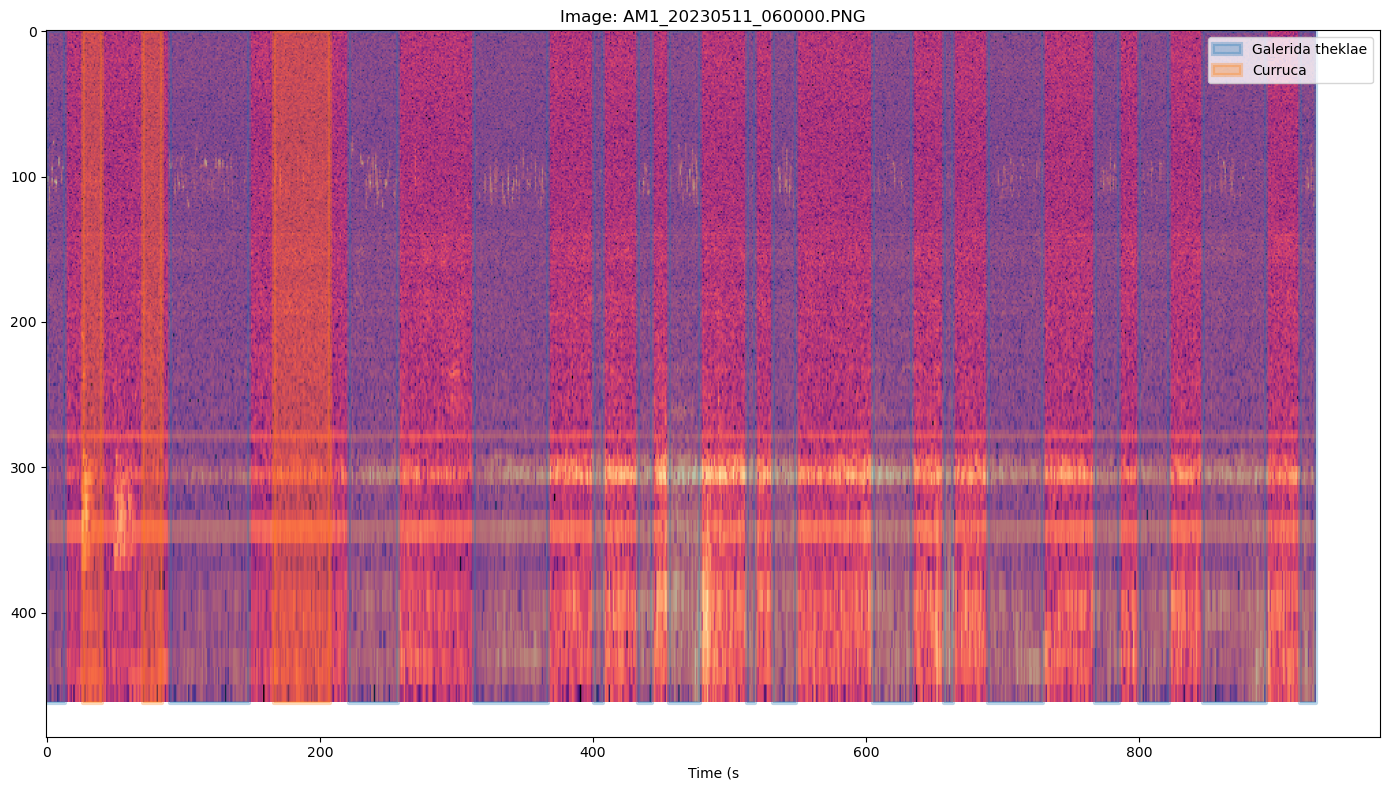

Image shape: (462, 930, 4)
Image size: 625 KB
Image resolution: 1400x800 pixels


In [44]:
# Function to load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    print(audio_name)
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[0, img.shape[0]], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    #ax.legend(loc='best')
    ax.set_xlabel('Time (s')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print image compression
    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')

    # Print images resolution
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


In [46]:
'''sample_audio = ROOT_PATH + "Data/Dataset/Audios/" + filtered_df["path"][0]

# Cargar el archivo de audio y obtener la frecuencia de muestreo
y, sr = librosa.load(sample_audio, sr=None)

# Imprimir la frecuencia de muestreo
print("Frecuencia de muestreo:", sr, "Hz")'''

MIN_FREQUENCY = 1
MAX_FREQUENCY = 32000

In [47]:
image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
img = plt.imread(image_path)
print(img.shape[0])

462


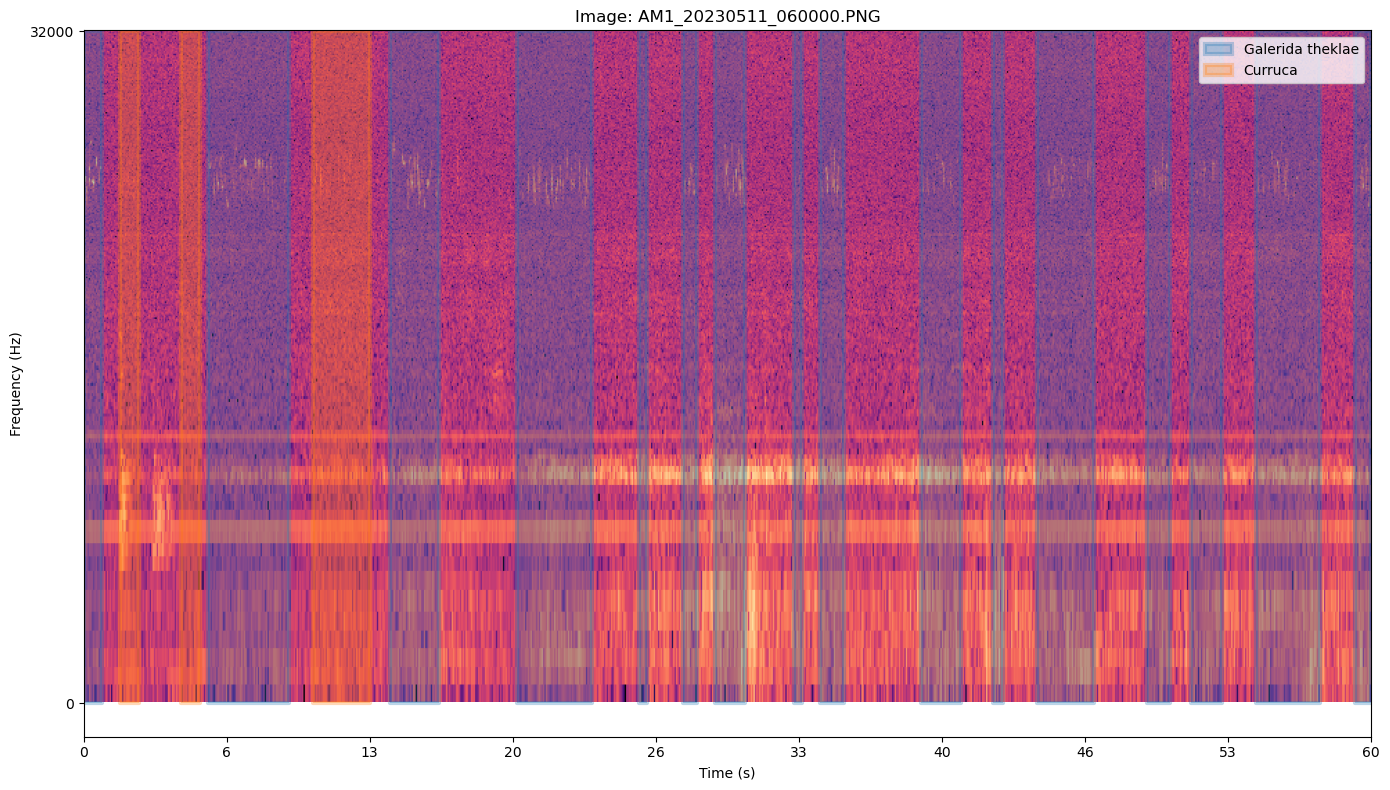

In [53]:
import numpy as np
import math

# Load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        low_frequency = row['low_frequency']
        high_frequency = row['high_frequency']
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])

            # Full frequencies
            bottom = 0
            top = img.shape[0]

            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[bottom, top], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

            # print(start, end, bottom, top)
    
    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    # Customize y-axis ticks and labels for frequency
    freq_ticks = [0, MAX_FREQUENCY]
    freq_labels = [str(tick) for tick in freq_ticks]
    ax.set_yticks([int(tick / MAX_FREQUENCY * img.shape[0]) for tick in freq_ticks])
    ax.set_yticklabels(np.flipud(freq_labels))  # Invert the frequency labels

    # Customize x-axis
    ax.set_xlim([0, 60])
    ax.set_xticks(np.linspace(0, img.shape[1], num=10))
    ax.set_xticklabels([str(int(tick / img.shape[1] * audio_duration)) for tick in ax.get_xticks()])

    # Show the plot
    plt.tight_layout()
    plt.show()

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


0 13 75.20468132603003 107.433401157297
90 148 72.92693703518182 108.37626520645722
26 40 78.33566835745341 104.13314530595045
221 257 71.63650771542001 111.43979057739739
918 930 75.4261063440141 107.57648497607187
313 367 76.87829316226777 110.98771184266701
401 407 87.57489001235729 102.15474719402414
433 443 84.59221851012643 102.15474719402414
456 478 75.7990605368181 104.92904786074047
513 519 89.07633383327635 103.73618303217978
689 730 77.24213362570941 107.33303427503773
657 664 87.94960094524583 102.15474719402414
532 549 74.70190680582533 109.35588939580384
166 207 79.3491060254832 110.54143158805817
605 634 74.94464638325042 108.31024189073304
847 893 74.70190680582533 105.82670203027016
800 822 78.33566835745341 105.82224571950331
768 785 75.4261063440141 103.44137900126731
70 84 81.63480643737245 102.94419133077923


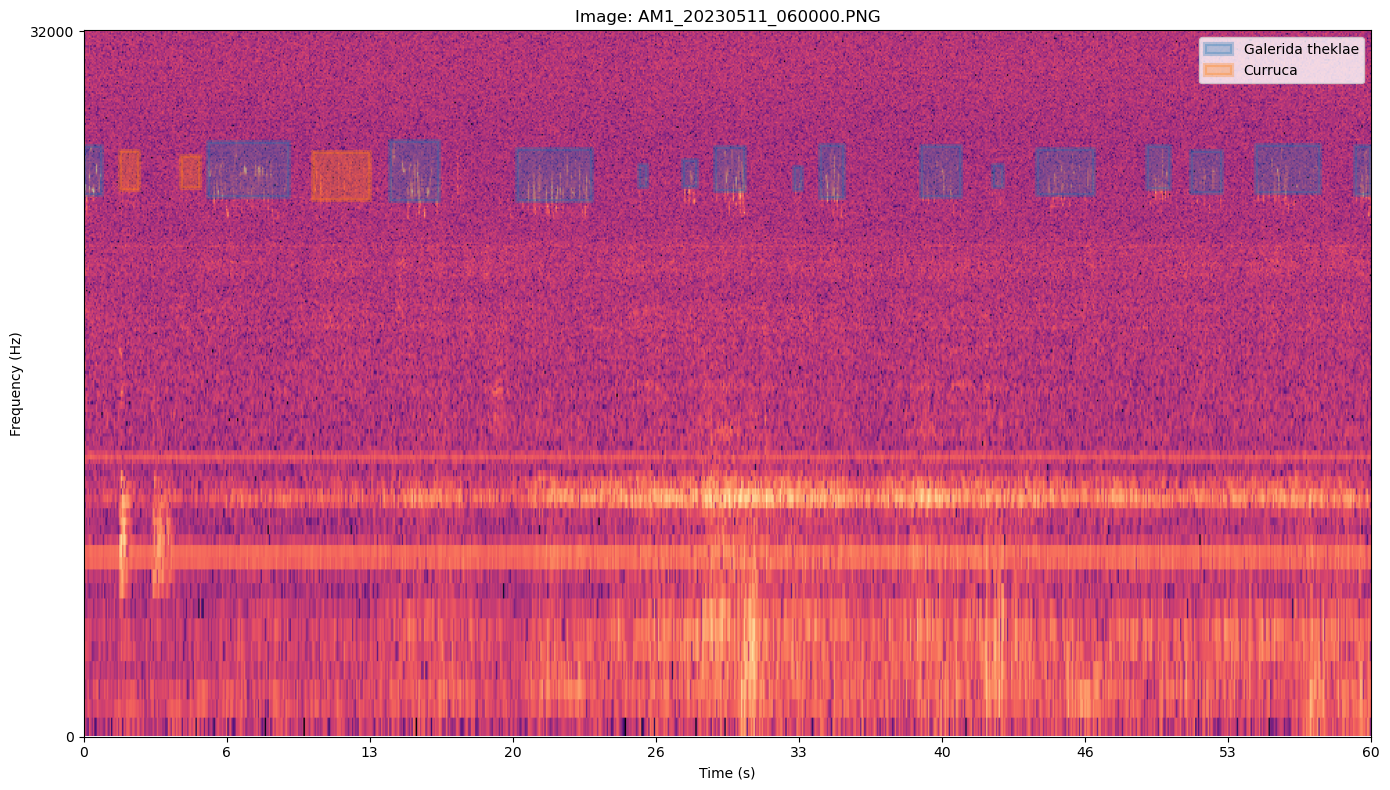

In [48]:
import numpy as np
import math

# Load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        low_frequency = row['low_frequency']
        high_frequency = row['high_frequency']
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])

            # Calculate vertical coordinates based on frequency range (0 to MAX_FREQUENCY)
            if low_frequency == 0:
                bottom = 0
            else:
                # bottom = float(((2595 * math.log(1 + (low_frequency/700), 10))) * img.shape[0])
                bottom = float(np.log(low_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            if high_frequency == MAX_FREQUENCY:
                top = MAX_FREQUENCY
            else:
                # top = float(((2595 * math.log(1 + (high_frequency/700), 10))) * img.shape[0])
                top = float(np.log(high_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            # Invert the y-coordinates
            bottom, top = img.shape[0] - top, img.shape[0] - bottom

            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[bottom, top], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

            print(start, end, bottom, top)
    
    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    # Customize y-axis ticks and labels for frequency
    freq_ticks = [0, MAX_FREQUENCY]
    freq_labels = [str(tick) for tick in freq_ticks]
    ax.set_yticks([int(tick / MAX_FREQUENCY * img.shape[0]) for tick in freq_ticks])
    ax.set_yticklabels(np.flipud(freq_labels))  # Invert the frequency labels

    # Customize x-axis
    ax.set_xlim([0, 60])
    ax.set_xticks(np.linspace(0, img.shape[1], num=10))
    ax.set_xticklabels([str(int(tick / img.shape[1] * audio_duration)) for tick in ax.get_xticks()])

    # Show the plot
    plt.tight_layout()
    plt.show()

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


744 930 83.53425096438093 225.6144614882971
770 792 98.02630837726122 123.14685580458882
620 930 33.576307942356834 101.8691673651727
724 742 72.99458743484416 199.01391646840818
423 534 111.53350534809385 136.9374774828729
81 99 81.40325435114516 116.33102923820815
1 320 30.870416893118488 109.02702663359383
314 405 109.91182209730033 135.65895469056557


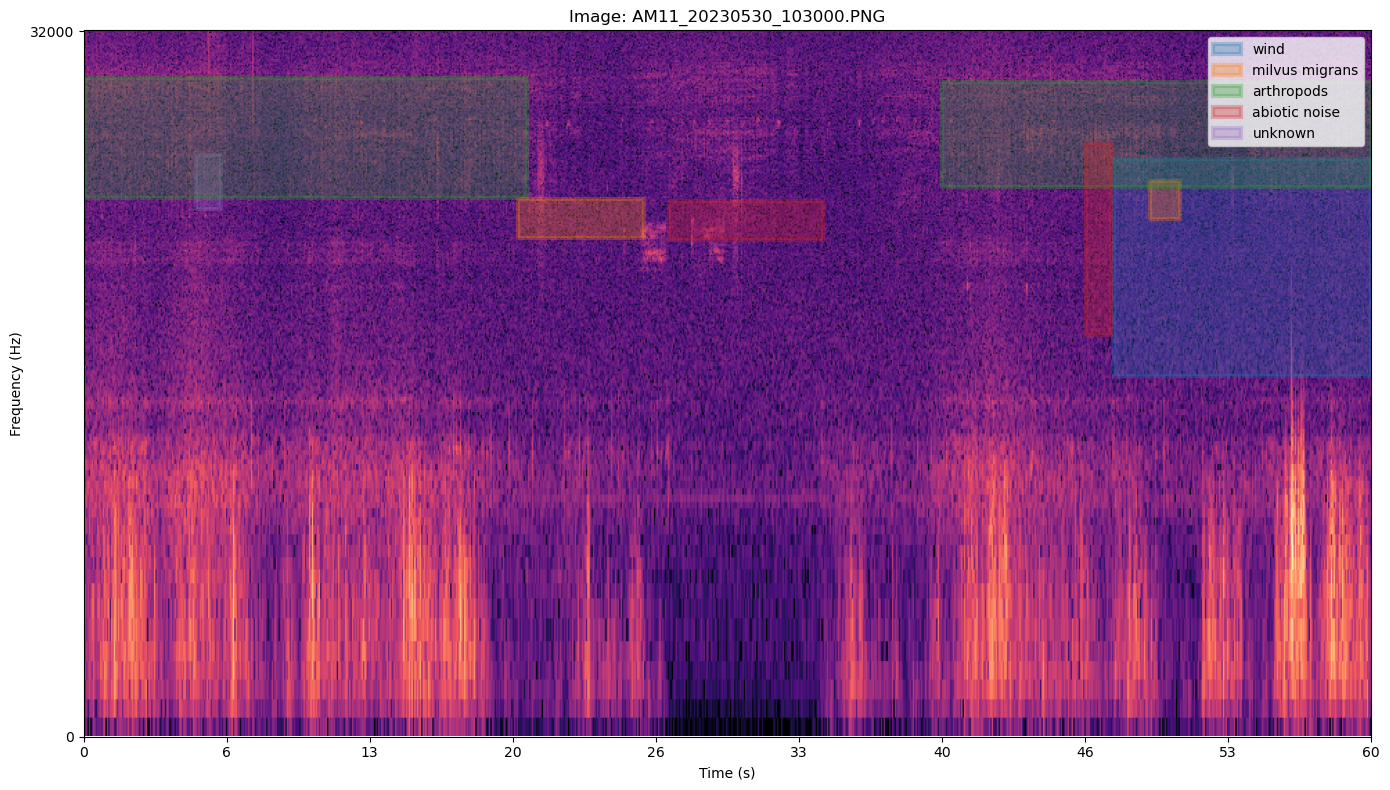

In [30]:
audio_name = "AM11_20230530_103000.WAV"

# Load image from audio
image_name = audio_name.replace(".WAV", "")

# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/images/"

# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

# Delete indexes from the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")

load_and_display_image(image_path, df)

In [24]:
# List image files in the Images directory
image_files = [os.path.join(image_root_directory, file) for file in os.listdir(image_root_directory) if file.endswith('.jpg')]

# Display each image along with annotations
for image_path in image_files:
    load_and_display_image(image_path, df)